## Quiz

In [7]:
from bs4 import BeautifulSoup
import os
import pandas as pd

In [18]:
# List of dictionaries to build file by file and later convert to a DataFrame
df_list = []
folder = 'C:\\Karthick\\git\\data_analyst_nano\\playground\\4\\data_wrangling\\rt-html\\'
for movie_html in os.listdir(folder):
    with open(os.path.join(folder, movie_html)) as file:
        beautiful_soup = BeautifulSoup(file)
        title = beautiful_soup.find('title').contents[0][:-len(" - Rotten Tomatoes")].strip()        
        scorePanelDiv = beautiful_soup.find('div', {'id':'scorePanel'})
        audienceScoreDiv = scorePanelDiv.find('div', {'class':'audience-score'})
        ScoreSpan = audienceScoreDiv.find('span', {'class':'superPageFontColor'})
        audience_score = ScoreSpan.contents[0].replace('%','')
        audienceInfoDiv = scorePanelDiv.find('div',{'class':'audience-info'})        
        superPageList = audienceInfoDiv.find_all('div')
        for s in superPageList:
            if "User Ratings" in s.find('span').contents[0]:
                num_audience_ratings = s.contents[2].strip().replace(',','')
        # Append to list of dictionaries
        df_list.append({'title': title,
                        'audience_score': int(audience_score),
                        'number_of_audience_ratings': int(num_audience_ratings)})
df = pd.DataFrame(df_list, columns = ['title', 'audience_score', 'number_of_audience_ratings'])

## Solution Test
Run the cell below the see if your solution is correct. If an `AssertionError` is thrown, your solution is incorrect. If no error is thrown, your solution is correct.

In [19]:
df_solution = pd.read_pickle('df_solution.pkl')
df.sort_values('title', inplace = True)
df.reset_index(inplace = True, drop = True)
df_solution.sort_values('title', inplace = True)
df_solution.reset_index(inplace = True, drop = True)
pd.testing.assert_frame_equal(df, df_solution)
#df_solution.head()

AssertionError: DataFrame.iloc[:, 0] are different

DataFrame.iloc[:, 0] values are different (3.0 %)
[left]:  [12 Angry Men (Twelve Angry Men) (1957), 12 Years a Slave (2013), A Hard Day's Night (1964), A Streetcar Named Desire (1951), Alien (1979), All About Eve (1950), All Quiet on the Western Front (1930), Apocalypse Now (1979), Argo (2012), Army of Shadows (L'ArmÃ©e des ombres) (1969), Arrival (2016), Baby Driver (2017), Battleship Potemkin (1925), Bicycle Thieves (Ladri di biciclette) (1949), Boyhood (2014), Brooklyn (2015), Casablanca (1942), Citizen Kane (1941), Dr. Strangelove Or How I Learned to Stop Worrying and Love the Bomb (1964), Dunkirk (2017), E.T. The Extra-Terrestrial (1982), Finding Nemo (2003), Frankenstein (1931), Get Out (2017), Gone With the Wind (1939), Gravity (2013), Harry Potter and the Deathly Hallows - Part 2 (2011), Hell or High Water (2016), High Noon (1952), Inside Out (2015), It Happened One Night (1934), Jaws (1975), King Kong (1933), L.A. Confidential (1997), La Grande illusion (Grand Illusion) (1938), La La Land (2016), Laura (1944), Logan (2017), Mad Max: Fury Road (2015), Man on Wire (2008), Manchester by the Sea (2016), Metropolis (1927), Modern Times (1936), Moonlight (2016), M (1931), North by Northwest (1959), Nosferatu, a Symphony of Horror (Nosferatu, eine Symphonie des Grauens) (Nosferatu the Vampire) (1922), On the Waterfront (1954), Open City (1946), Pinocchio (1940), Psycho (1960), RashÃ´mon (1951), Rear Window (1954), Rebecca (1940), Repulsion (1965), Roman Holiday (1953), Rosemary's Baby (1968), Selma (2015), Seven Samurai (Shichinin no Samurai) (1956), Singin' in the Rain (1952), Skyfall (2012), Snow White and the Seven Dwarfs (1937), Spotlight (2015), Star Trek (2009), Star Wars: Episode VII - The Force Awakens (2015), Sunset Boulevard (1950), Taxi Driver (1976), The 39 Steps (1935), The 400 Blows (Les Quatre cents coups) (1959), The Adventures of Robin Hood (1938), The Babadook (2014), The Battle of Algiers (La Battaglia di Algeri) (1967), The Big Sick (2017), The Bride of Frankenstein (1935), The Cabinet of Dr. Caligari (Das Cabinet des Dr. Caligari) (1920), The Conformist (1970), The Dark Knight (2008), The Godfather, Part II (1974), The Godfather (1972), The Good, the Bad and the Ugly (1966), The Grapes of Wrath (1940), The Jungle Book (2016), The Last Picture Show (1971), The Maltese Falcon (1941), The Night of the Hunter (1955), The Philadelphia Story (1940), The Third Man (1949), The Treasure of the Sierra Madre (1948), The Wages of Fear (1953), The Wizard of Oz (1939), The Wrestler (2008), Tokyo Story (TÃ´kyÃ´ monogatari) (1953), Touch of Evil (1958), Toy Story 2 (1999), Toy Story 3 (2010), Toy Story (1995), Up (2009), Vertigo (1958), Wonder Woman (2017), Zootopia (2016)]
[right]: [12 Angry Men (Twelve Angry Men) (1957), 12 Years a Slave (2013), A Hard Day's Night (1964), A Streetcar Named Desire (1951), Alien (1979), All About Eve (1950), All Quiet on the Western Front (1930), Apocalypse Now (1979), Argo (2012), Army of Shadows (L'Armée des ombres) (1969), Arrival (2016), Baby Driver (2017), Battleship Potemkin (1925), Bicycle Thieves (Ladri di biciclette) (1949), Boyhood (2014), Brooklyn (2015), Casablanca (1942), Citizen Kane (1941), Dr. Strangelove Or How I Learned to Stop Worrying and Love the Bomb (1964), Dunkirk (2017), E.T. The Extra-Terrestrial (1982), Finding Nemo (2003), Frankenstein (1931), Get Out (2017), Gone With the Wind (1939), Gravity (2013), Harry Potter and the Deathly Hallows - Part 2 (2011), Hell or High Water (2016), High Noon (1952), Inside Out (2015), It Happened One Night (1934), Jaws (1975), King Kong (1933), L.A. Confidential (1997), La Grande illusion (Grand Illusion) (1938), La La Land (2016), Laura (1944), Logan (2017), Mad Max: Fury Road (2015), Man on Wire (2008), Manchester by the Sea (2016), Metropolis (1927), Modern Times (1936), Moonlight (2016), M (1931), North by Northwest (1959), Nosferatu, a Symphony of Horror (Nosferatu, eine Symphonie des Grauens) (Nosferatu the Vampire) (1922), On the Waterfront (1954), Open City (1946), Pinocchio (1940), Psycho (1960), Rashômon (1951), Rear Window (1954), Rebecca (1940), Repulsion (1965), Roman Holiday (1953), Rosemary's Baby (1968), Selma (2015), Seven Samurai (Shichinin no Samurai) (1956), Singin' in the Rain (1952), Skyfall (2012), Snow White and the Seven Dwarfs (1937), Spotlight (2015), Star Trek (2009), Star Wars: Episode VII - The Force Awakens (2015), Sunset Boulevard (1950), Taxi Driver (1976), The 39 Steps (1935), The 400 Blows (Les Quatre cents coups) (1959), The Adventures of Robin Hood (1938), The Babadook (2014), The Battle of Algiers (La Battaglia di Algeri) (1967), The Big Sick (2017), The Bride of Frankenstein (1935), The Cabinet of Dr. Caligari (Das Cabinet des Dr. Caligari) (1920), The Conformist (1970), The Dark Knight (2008), The Godfather, Part II (1974), The Godfather (1972), The Good, the Bad and the Ugly (1966), The Grapes of Wrath (1940), The Jungle Book (2016), The Last Picture Show (1971), The Maltese Falcon (1941), The Night of the Hunter (1955), The Philadelphia Story (1940), The Third Man (1949), The Treasure of the Sierra Madre (1948), The Wages of Fear (1953), The Wizard of Oz (1939), The Wrestler (2008), Tokyo Story (Tôkyô monogatari) (1953), Touch of Evil (1958), Toy Story 2 (1999), Toy Story 3 (2010), Toy Story (1995), Up (2009), Vertigo (1958), Wonder Woman (2017), Zootopia (2016)]

In [17]:
df.head()

,title,audience_score,number_of_audience_ratings
0,12 Angry Men (Twelve Angry Men) (1957),97,103672
1,12 Years a Slave (2013),90,138789
2,A Hard Day's Night (1964),89,50067
3,A Streetcar Named Desire (1951),90,54761
4,Alien (1979),94,457186


In [20]:
df_critics = pd.read_csv('bestofrt.tsv', sep='\t')

In [40]:
df_critics['title']= df_critics['title'].str.strip() 
df_critics['title_len'] = df_critics['title'].str.len()
df_critics = df_critics.sort_values(by='title').reset_index()

In [41]:
df['title_len'] = df['title'].str.len()
df.head()

,title,audience_score,number_of_audience_ratings,title_len
0,12 Angry Men (Twelve Angry Men) (1957),97,103672,38
1,12 Years a Slave (2013),90,138789,23
2,A Hard Day's Night (1964),89,50067,25
3,A Streetcar Named Desire (1951),90,54761,31
4,Alien (1979),94,457186,12


In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

df_joined = df.join(df_critics, how='outer', lsuffix='l_', rsuffix='r_')


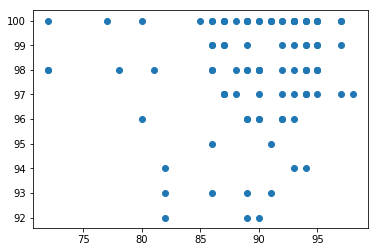

In [47]:
plt.scatter(df_joined.audience_score, df_joined.critic_score)

In [46]:
df_joined.columns

Index(['titlel_', 'audience_score', 'number_of_audience_ratings',
       'title_lenl_', 'index', 'ranking', 'critic_score', 'titler_',
       'number_of_critic_ratings', 'title_lenr_'],
      dtype='object')